<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4: Classification with Yelp, SGD, OOP

## Yelp

---

In this project you will be investigating a small version of the [Yelp challenge dataset](https://www.yelp.com/dataset_challenge). You'll practice using classification algorithms, cross-validation, gridsearching – all that good stuff.

---

### The data

There are 5 individual .csv files that have the information, zipped into .7z format like with the SF data last project. The dataset is located in your datasets folder:

    DSI-SF-2/datasets/yelp_arizona_data.7z

The columns in each are:

    businesses_small_parsed.csv
        business_id: unique business identifier
        name: name of the business
        review_count: number of reviews per business
        city: city business resides in
        stars: average rating
        categories: categories the business falls into (can be one or multiple)
        latitude
        longitude
        neighborhoods: neighborhoods business belongs to
        variable: "property" of the business (a tag)
        value: True/False for the property
        
    reviews_small_nlp_parsed.csv
        user_id: unique user identifier
        review_id: unique review identifier
        votes.cool: how many thought the review was "cool"
        business_id: unique business id the review is for
        votes.funny: how many thought the review was funny
        stars: rating given
        date: date of review
        votes.useful: how many thought the review was useful
        ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review
        
    users_small_parsed.csv
        yelping_since: signup date
        compliments.plain: # of compliments "plain"
        review_count: # of reviews:
        compliments.cute: total # of compliments "cute"
        compliments.writer: # of compliments "writer"
        compliments.note: # of compliments "note" (not sure what this is)
        compliments.hot: # of compliments "hot" (?)
        compliments.cool: # of compliments "cool"
        compliments.profile: # of compliments "profile"
        average_stars: average rating
        compliments.more: # of compliments "more"
        elite: years considered "elite"
        name: user's name
        user_id: unique user id
        votes.cool: # of votes "cool"
        compliments.list: # of compliments "list"
        votes.funny: # of compliments "funny"
        compliments.photos: # of compliments "photos"
        compliments.funny: # of compliments "funny"
        votes.useful: # of votes "useful"
       
    checkins_small_parsed.csv
        business_id: unique business identifier
        variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
        value: # of checkins at that time
    
    tips_small_nlp_parsed.csv
        user_id: unique user identifier
        business_id: unique business identifier
        likes: likes that the tip has
        date: date of tip
        ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip

The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. I'm not sure whether the compliments or votes are _by_ the user or _for_ the user.

---

If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

    Phoenix
    Surprise
    Las Vegas
    Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because I thought the mix of them was funny:

    Airports
    Breakfast & Brunch
    Bubble Tea
    Burgers
    Bars
    Bakeries
    Breweries
    Cafes
    Candy Stores
    Comedy Clubs
    Courthouses
    Dance Clubs
    Fast Food
    Museums
    Tattoo
    Vape Shops
    Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

from ipywidgets import *
from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

In [2]:
business = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/yelp_arizona_data/businesses_small_parsed.csv')
checkins = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/yelp_arizona_data/checkins_small_parsed.csv')
reviews = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/yelp_arizona_data/reviews_small_nlp_parsed.csv')
tips = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/yelp_arizona_data/tips_small_nlp_parsed.csv')
users = pd.read_csv('/Users/keatoncarano/Desktop/dsi-sf-7-materials-Keaton/datasets/yelp_arizona_data/users_small_parsed.csv')

In [3]:
print business.shape
print business.columns

business.head()

(152832, 11)
Index([u'business_id', u'name', u'review_count', u'city', u'stars',
       u'categories', u'latitude', u'longitude', u'neighborhoods', u'variable',
       u'value'],
      dtype='object')


,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,Phoenix,2.5,"['American (New)', 'Nightlife', 'Dance Clubs',...",33.448399,-112.071702,[],attributes.Ambience.divey,False
1,SiwN7f0N4bs4ZtPc4yPgiA,Palazzo,19,Phoenix,3.0,"['Bars', 'Nightlife', 'Dance Clubs']",33.455885,-112.074177,[],attributes.Ambience.divey,False
2,e5kc0CQ4R-PCCDgb274gSg,Canyon Cafe,238,Phoenix,3.5,"['Cafes', 'Mexican', 'Tex-Mex', 'Restaurants']",33.452154,-112.068620,[],attributes.Ambience.divey,False
3,neGAQFkBNI8-rpPBLBzNkw,Taco Bell,10,Phoenix,4.0,"['Fast Food', 'Mexican', 'Tex-Mex', 'Restauran...",33.465440,-112.069090,[],attributes.Ambience.divey,False
4,45puCRQ6Vh_IIAy7kkfFDQ,Majerle's Sports Grill,205,Phoenix,3.5,"['Bars', 'Restaurants', 'American (Traditional...",33.448465,-112.071257,[],attributes.Ambience.divey,False


In [6]:
import itertools

categories = business.categories.apply(eval)
business_copy = business.copy()
business_copy['categories'] = categories
unique_categories = set(list(itertools.chain(*categories.tolist())))

In [7]:
business_copy.head()

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,Phoenix,2.5,"[American (New), Nightlife, Dance Clubs, Resta...",33.448399,-112.071702,[],attributes.Ambience.divey,False
1,SiwN7f0N4bs4ZtPc4yPgiA,Palazzo,19,Phoenix,3.0,"[Bars, Nightlife, Dance Clubs]",33.455885,-112.074177,[],attributes.Ambience.divey,False
2,e5kc0CQ4R-PCCDgb274gSg,Canyon Cafe,238,Phoenix,3.5,"[Cafes, Mexican, Tex-Mex, Restaurants]",33.452154,-112.068620,[],attributes.Ambience.divey,False
3,neGAQFkBNI8-rpPBLBzNkw,Taco Bell,10,Phoenix,4.0,"[Fast Food, Mexican, Tex-Mex, Restaurants]",33.465440,-112.069090,[],attributes.Ambience.divey,False
4,45puCRQ6Vh_IIAy7kkfFDQ,Majerle's Sports Grill,205,Phoenix,3.5,"[Bars, Restaurants, American (Traditional), Sp...",33.448465,-112.071257,[],attributes.Ambience.divey,False


In [8]:
#simplified list of categories
given_cats = ['Airports', 'Breakfast & Brunch', 'Bubble Tea', 'Burgers', 'Bars', 'Bakeries', 'Breweries',
             'Cafes', 'Candy Stores', 'Comedy Clubs', 'Courthouses', 'Dance Clubs', 'Fast Food', 
             'Museums', 'Tattoo', 'Vape Shops', 'Yoga']

    
for cat in given_cats:
    business_copy[cat] = business_copy['categories'].apply(lambda x: cat in x)



In [9]:
business_copy.head()


,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,...,Cafes,Candy Stores,Comedy Clubs,Courthouses,Dance Clubs,Fast Food,Museums,Tattoo,Vape Shops,Yoga
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,Phoenix,2.5,"[American (New), Nightlife, Dance Clubs, Resta...",33.448399,-112.071702,[],attributes.Ambience.divey,...,False,False,False,False,True,False,False,False,False,False
1,SiwN7f0N4bs4ZtPc4yPgiA,Palazzo,19,Phoenix,3.0,"[Bars, Nightlife, Dance Clubs]",33.455885,-112.074177,[],attributes.Ambience.divey,...,False,False,False,False,True,False,False,False,False,False
2,e5kc0CQ4R-PCCDgb274gSg,Canyon Cafe,238,Phoenix,3.5,"[Cafes, Mexican, Tex-Mex, Restaurants]",33.452154,-112.068620,[],attributes.Ambience.divey,...,True,False,False,False,False,False,False,False,False,False
3,neGAQFkBNI8-rpPBLBzNkw,Taco Bell,10,Phoenix,4.0,"[Fast Food, Mexican, Tex-Mex, Restaurants]",33.465440,-112.069090,[],attributes.Ambience.divey,...,False,False,False,False,False,True,False,False,False,False
4,45puCRQ6Vh_IIAy7kkfFDQ,Majerle's Sports Grill,205,Phoenix,3.5,"[Bars, Restaurants, American (Traditional), Sp...",33.448465,-112.071257,[],attributes.Ambience.divey,...,False,False,False,False,False,False,False,False,False,False


In [10]:
print tips.shape, tips.columns
tips.describe()

(101991, 104) Index([u'user_id', u'business_id', u'likes', u'date', u'24 hours',
       u'amazing food', u'animal style', u'awesome food', u'awesome place',
       u'awesome service',
       ...
       u'service good', u'service great', u'slow service', u'staff friendly',
       u'staff great', u'steak eggs', u'super friendly', u'sweet potato',
       u'velvet pancakes', u'worth wait'],
      dtype='object', length=104)


,likes,24 hours,amazing food,animal style,awesome food,awesome place,awesome service,beef hash,beer selection,best breakfast,...,service good,service great,slow service,staff friendly,staff great,steak eggs,super friendly,sweet potato,velvet pancakes,worth wait
count,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,...,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000,101991.000000
mean,0.015403,0.001481,0.002432,0.002128,0.002226,0.001304,0.001245,0.001245,0.002216,0.002275,...,0.002373,0.004167,0.001883,0.001549,0.001441,0.001500,0.001471,0.002549,0.002039,0.001784
std,0.137377,0.038449,0.049251,0.047544,0.047332,0.036088,0.035266,0.035543,0.047229,0.047640,...,0.048854,0.064570,0.043347,0.039329,0.037937,0.039206,0.038322,0.050620,0.045114,0.042206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000


In [11]:
print reviews.columns, reviews.shape
reviews.head()

Index([u'user_id', u'review_id', u'votes.cool', u'business_id', u'votes.funny',
       u'stars', u'date', u'votes.useful', u'10 minutes', u'15 minutes',
       ...
       u'service great', u'staff friendly', u'super friendly', u'sweet potato',
       u'tasted like', u'time vegas', u'try place', u've seen', u've tried',
       u'wait staff'],
      dtype='object', length=108) (322398, 108)


,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sEWeeq41k4ohBz4jS_iGRw,tOhOHUAS7XJch7a_HW5Csw,3,EmzaQR5hQlF0WIl24NxAZA,12,2,2008-04-21,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1AqEqmmVHgYCuzcMrF4h2g,2aGafu-x7onydGoDgDfeQQ,0,EmzaQR5hQlF0WIl24NxAZA,2,2,2009-11-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pv82zTlB5Txsu2Pusu__FA,CY4SWiYcUZTWS_T_cGaGPA,4,EmzaQR5hQlF0WIl24NxAZA,9,2,2010-08-16,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jlr3OBS1_Y3Lqa-H3-FR1g,VCKytaG-_YkxmQosH4E0jw,0,EmzaQR5hQlF0WIl24NxAZA,1,4,2010-12-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print users.shape, users.columns
users.head()

(144206, 21) Index([u'yelping_since', u'compliments.plain', u'review_count',
       u'compliments.cute', u'compliments.writer', u'fans',
       u'compliments.note', u'compliments.hot', u'compliments.cool',
       u'compliments.profile', u'average_stars', u'compliments.more', u'elite',
       u'name', u'user_id', u'votes.cool', u'compliments.list', u'votes.funny',
       u'compliments.photos', u'compliments.funny', u'votes.useful'],
      dtype='object')


,yelping_since,compliments.plain,review_count,compliments.cute,compliments.writer,fans,compliments.note,compliments.hot,compliments.cool,compliments.profile,...,compliments.more,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful
0,2004-10,959.0,1274,206.0,327.0,1179,611.0,1094.0,1642.0,116.0,...,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199
1,2004-10,89.0,442,23.0,24.0,100,83.0,101.0,145.0,9.0,...,19.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Michael,4U9kSBLuBDU391x6bxU-YA,732,4.0,908,24.0,120.0,1483
2,2004-10,2.0,66,2.0,2.0,4,1.0,1.0,1.0,NaN,...,1.0,[2005],Katherine,SIBCL7HBkrP4llolm4SC2A,13,NaN,11,NaN,NaN,34
3,2004-10,5.0,101,1.0,3.0,7,3.0,5.0,4.0,1.0,...,2.0,[],Nader,UTS9XcT14H2ZscRIf0MYHQ,49,NaN,53,1.0,8.0,243
4,2004-10,104.0,983,82.0,17.0,78,85.0,265.0,212.0,9.0,...,16.0,"[2005, 2006, 2007, 2008, 2010, 2011, 2012]",Helen,ZWOj6LmzwGvMDh-A85EOtA,1928,3.0,1109,57.0,70.0,2404


In [13]:
business_copy.groupby(['city'])['Dance Clubs'].mean()

city
Las Vegas    0.039502
Phoenix      0.017249
Surprise     0.037660
Waterloo     0.019196
Name: Dance Clubs, dtype: float64

In [17]:
for c in business_copy.city.unique():   
    business_copy[c] = business_copy['city'].apply(lambda x: c in x)

In [18]:
business_copy.columns

Index([u'business_id', u'name', u'review_count', u'city', u'stars',
       u'categories', u'latitude', u'longitude', u'neighborhoods', u'variable',
       u'value', u'Airports', u'Breakfast & Brunch', u'Bubble Tea', u'Burgers',
       u'Bars', u'Bakeries', u'Breweries', u'Cafes', u'Candy Stores',
       u'Comedy Clubs', u'Courthouses', u'Dance Clubs', u'Fast Food',
       u'Museums', u'Tattoo', u'Vape Shops', u'Yoga', u'Phoenix', u'Surprise',
       u'Las Vegas', u'Waterloo'],
      dtype='object')

In [19]:
business_copy.head()

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,...,Dance Clubs,Fast Food,Museums,Tattoo,Vape Shops,Yoga,Phoenix,Surprise,Las Vegas,Waterloo
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,Phoenix,2.5,"[American (New), Nightlife, Dance Clubs, Resta...",33.448399,-112.071702,[],attributes.Ambience.divey,...,True,False,False,False,False,False,True,False,False,False
1,SiwN7f0N4bs4ZtPc4yPgiA,Palazzo,19,Phoenix,3.0,"[Bars, Nightlife, Dance Clubs]",33.455885,-112.074177,[],attributes.Ambience.divey,...,True,False,False,False,False,False,True,False,False,False
2,e5kc0CQ4R-PCCDgb274gSg,Canyon Cafe,238,Phoenix,3.5,"[Cafes, Mexican, Tex-Mex, Restaurants]",33.452154,-112.068620,[],attributes.Ambience.divey,...,False,False,False,False,False,False,True,False,False,False
3,neGAQFkBNI8-rpPBLBzNkw,Taco Bell,10,Phoenix,4.0,"[Fast Food, Mexican, Tex-Mex, Restaurants]",33.465440,-112.069090,[],attributes.Ambience.divey,...,False,True,False,False,False,False,True,False,False,False
4,45puCRQ6Vh_IIAy7kkfFDQ,Majerle's Sports Grill,205,Phoenix,3.5,"[Bars, Restaurants, American (Traditional), Sp...",33.448465,-112.071257,[],attributes.Ambience.divey,...,False,False,False,False,False,False,True,False,False,False


In [20]:
business_copy['Las Vegas'].dtype

dtype('bool')

In [21]:
bus_bool = []
for column in business_copy:
    if business_copy[column].dtype == bool:
        bus_bool.append(column)
        #business_copy.column = business_copy.column.astype(int)

In [22]:
for col in bus_bool:
    business_copy[col] = business_copy[col].astype(int)

In [23]:
business_copy.head()

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,...,Dance Clubs,Fast Food,Museums,Tattoo,Vape Shops,Yoga,Phoenix,Surprise,Las Vegas,Waterloo
0,EmzaQR5hQlF0WIl24NxAZA,Sky Lounge,25,Phoenix,2.5,"[American (New), Nightlife, Dance Clubs, Resta...",33.448399,-112.071702,[],attributes.Ambience.divey,...,1,0,0,0,0,0,1,0,0,0
1,SiwN7f0N4bs4ZtPc4yPgiA,Palazzo,19,Phoenix,3.0,"[Bars, Nightlife, Dance Clubs]",33.455885,-112.074177,[],attributes.Ambience.divey,...,1,0,0,0,0,0,1,0,0,0
2,e5kc0CQ4R-PCCDgb274gSg,Canyon Cafe,238,Phoenix,3.5,"[Cafes, Mexican, Tex-Mex, Restaurants]",33.452154,-112.068620,[],attributes.Ambience.divey,...,0,0,0,0,0,0,1,0,0,0
3,neGAQFkBNI8-rpPBLBzNkw,Taco Bell,10,Phoenix,4.0,"[Fast Food, Mexican, Tex-Mex, Restaurants]",33.465440,-112.069090,[],attributes.Ambience.divey,...,0,1,0,0,0,0,1,0,0,0
4,45puCRQ6Vh_IIAy7kkfFDQ,Majerle's Sports Grill,205,Phoenix,3.5,"[Bars, Restaurants, American (Traditional), Sp...",33.448465,-112.071257,[],attributes.Ambience.divey,...,0,0,0,0,0,0,1,0,0,0


In [24]:
y = business_copy['Las Vegas']

In [40]:
X = business_copy.drop(['Las Vegas', 'Surprise','Waterloo','Phoenix','latitude', 'longitude'], axis=1)

In [41]:
X = X._get_numeric_data()

In [42]:
X.head()

,review_count,stars,Airports,Breakfast & Brunch,Bubble Tea,Burgers,Bars,Bakeries,Breweries,Cafes,Candy Stores,Comedy Clubs,Courthouses,Dance Clubs,Fast Food,Museums,Tattoo,Vape Shops,Yoga
0,25,2.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,19,3.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,238,3.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,10,4.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,205,3.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
y.unique()

array([0, 1])

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_uni_n3 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uni_n3.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn):
    
    scores = []
    cv_indices = StratifiedKFold(n_splits=5)
    for train_i, test_i in cv_indices.split(X,y):
        
        X_train = X.ix[train_i, :]
        X_test = X.ix[test_i, :]

        y_train = y.ix[train_i]
        y_test = y.ix[test_i]

        knn.fit(X_train, y_train)
        
        acc = knn.score(X_test, y_test)
        scores.append(acc)
        
        
    return scores, np.mean(scores)
    


In [57]:
accs, mean_acc = accuracy_crossvalidator(X, y, knn_uni_n3)
accs, mean_acc

([0.85952170641541537,
  0.84686099388229141,
  0.86272777832302805,
  0.85968069096381605,
  0.84835596270243741],
 0.85542942645739761)

The above results above show consistent cross val scores for the knn  and it has very solid accuracy

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier()

scores_rf = cross_val_score(rf, X, y, cv=10, n_jobs=-1)
scores_rf

array([ 0.88092122,  0.87863125,  0.8803978 ,  0.86907878,  0.87967022,
        0.88169862,  0.87626775,  0.88765295,  0.87907342,  0.86965057])

In [ ]:
# rf = RandomForestClassifier()

# scores_rf = cross_val_score(rf, X, y, cv=10, n_jobs=-1)
# scores_rf

# np.mean(scores_rf) 

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)
# rf.fit(X_train, y_train)

# y_pred = rf.predict(X_test)

# print accuracy_score(y_test, y_pred)
# print precision_score(y_test, y_pred)
# print recall_score(y_test, y_pred)
# print f1_score(y_test, y_pred)

# x_cols = X.columns
# feat_imp = sorted(zip(rf.feature_importances_, x_cols), reverse=True)
# feat_imp

In [51]:
np.mean(scores_rf) #this score is higher on average than the KNN classifier above it

0.87830425763880782

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

In [62]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [64]:
y_pred = rf.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score 

In [70]:
print accuracy_score(y_test, y_pred)
print precision_score(y_test, y_pred)
print recall_score(y_test, y_pred)
print f1_score(y_test, y_pred)


0.875028625642
0.881947303417
0.91823831976
0.89972700546


In [87]:
x_cols = X.columns
feat_imp = sorted(zip(rf.feature_importances_, x_cols), reverse=True)
feat_imp

[(0.83277144685161719, 'review_count'),
 (0.093359396800149569, 'stars'),
 (0.012480913600313554, 'Bars'),
 (0.012368207236228997, 'Breakfast & Brunch'),
 (0.008687336130765163, 'Burgers'),
 (0.0074243290346619698, 'Bakeries'),
 (0.0073618603138597581, 'Cafes'),
 (0.0060934302581132967, 'Fast Food'),
 (0.0050260310743421134, 'Dance Clubs'),
 (0.0025435645757066003, 'Breweries'),
 (0.0021635550414289455, 'Bubble Tea'),
 (0.0021055859464569168, 'Vape Shops'),
 (0.0020148695063064042, 'Tattoo'),
 (0.0018575825895270064, 'Comedy Clubs'),
 (0.0014890988202626962, 'Yoga'),
 (0.00099511956395787957, 'Museums'),
 (0.00090663125246247137, 'Candy Stores'),
 (0.00031822686667496591, 'Airports'),
 (3.2814537164495198e-05, 'Courthouses')]

In [88]:
feat_imp

[(0.83277144685161719, 'review_count'),
 (0.093359396800149569, 'stars'),
 (0.012480913600313554, 'Bars'),
 (0.012368207236228997, 'Breakfast & Brunch'),
 (0.008687336130765163, 'Burgers'),
 (0.0074243290346619698, 'Bakeries'),
 (0.0073618603138597581, 'Cafes'),
 (0.0060934302581132967, 'Fast Food'),
 (0.0050260310743421134, 'Dance Clubs'),
 (0.0025435645757066003, 'Breweries'),
 (0.0021635550414289455, 'Bubble Tea'),
 (0.0021055859464569168, 'Vape Shops'),
 (0.0020148695063064042, 'Tattoo'),
 (0.0018575825895270064, 'Comedy Clubs'),
 (0.0014890988202626962, 'Yoga'),
 (0.00099511956395787957, 'Museums'),
 (0.00090663125246247137, 'Candy Stores'),
 (0.00031822686667496591, 'Airports'),
 (3.2814537164495198e-05, 'Courthouses')]

In [94]:
category = []
importance = []

for feature in feat_imp:
    category.append(feature[1])
    importance.append(feature[0])


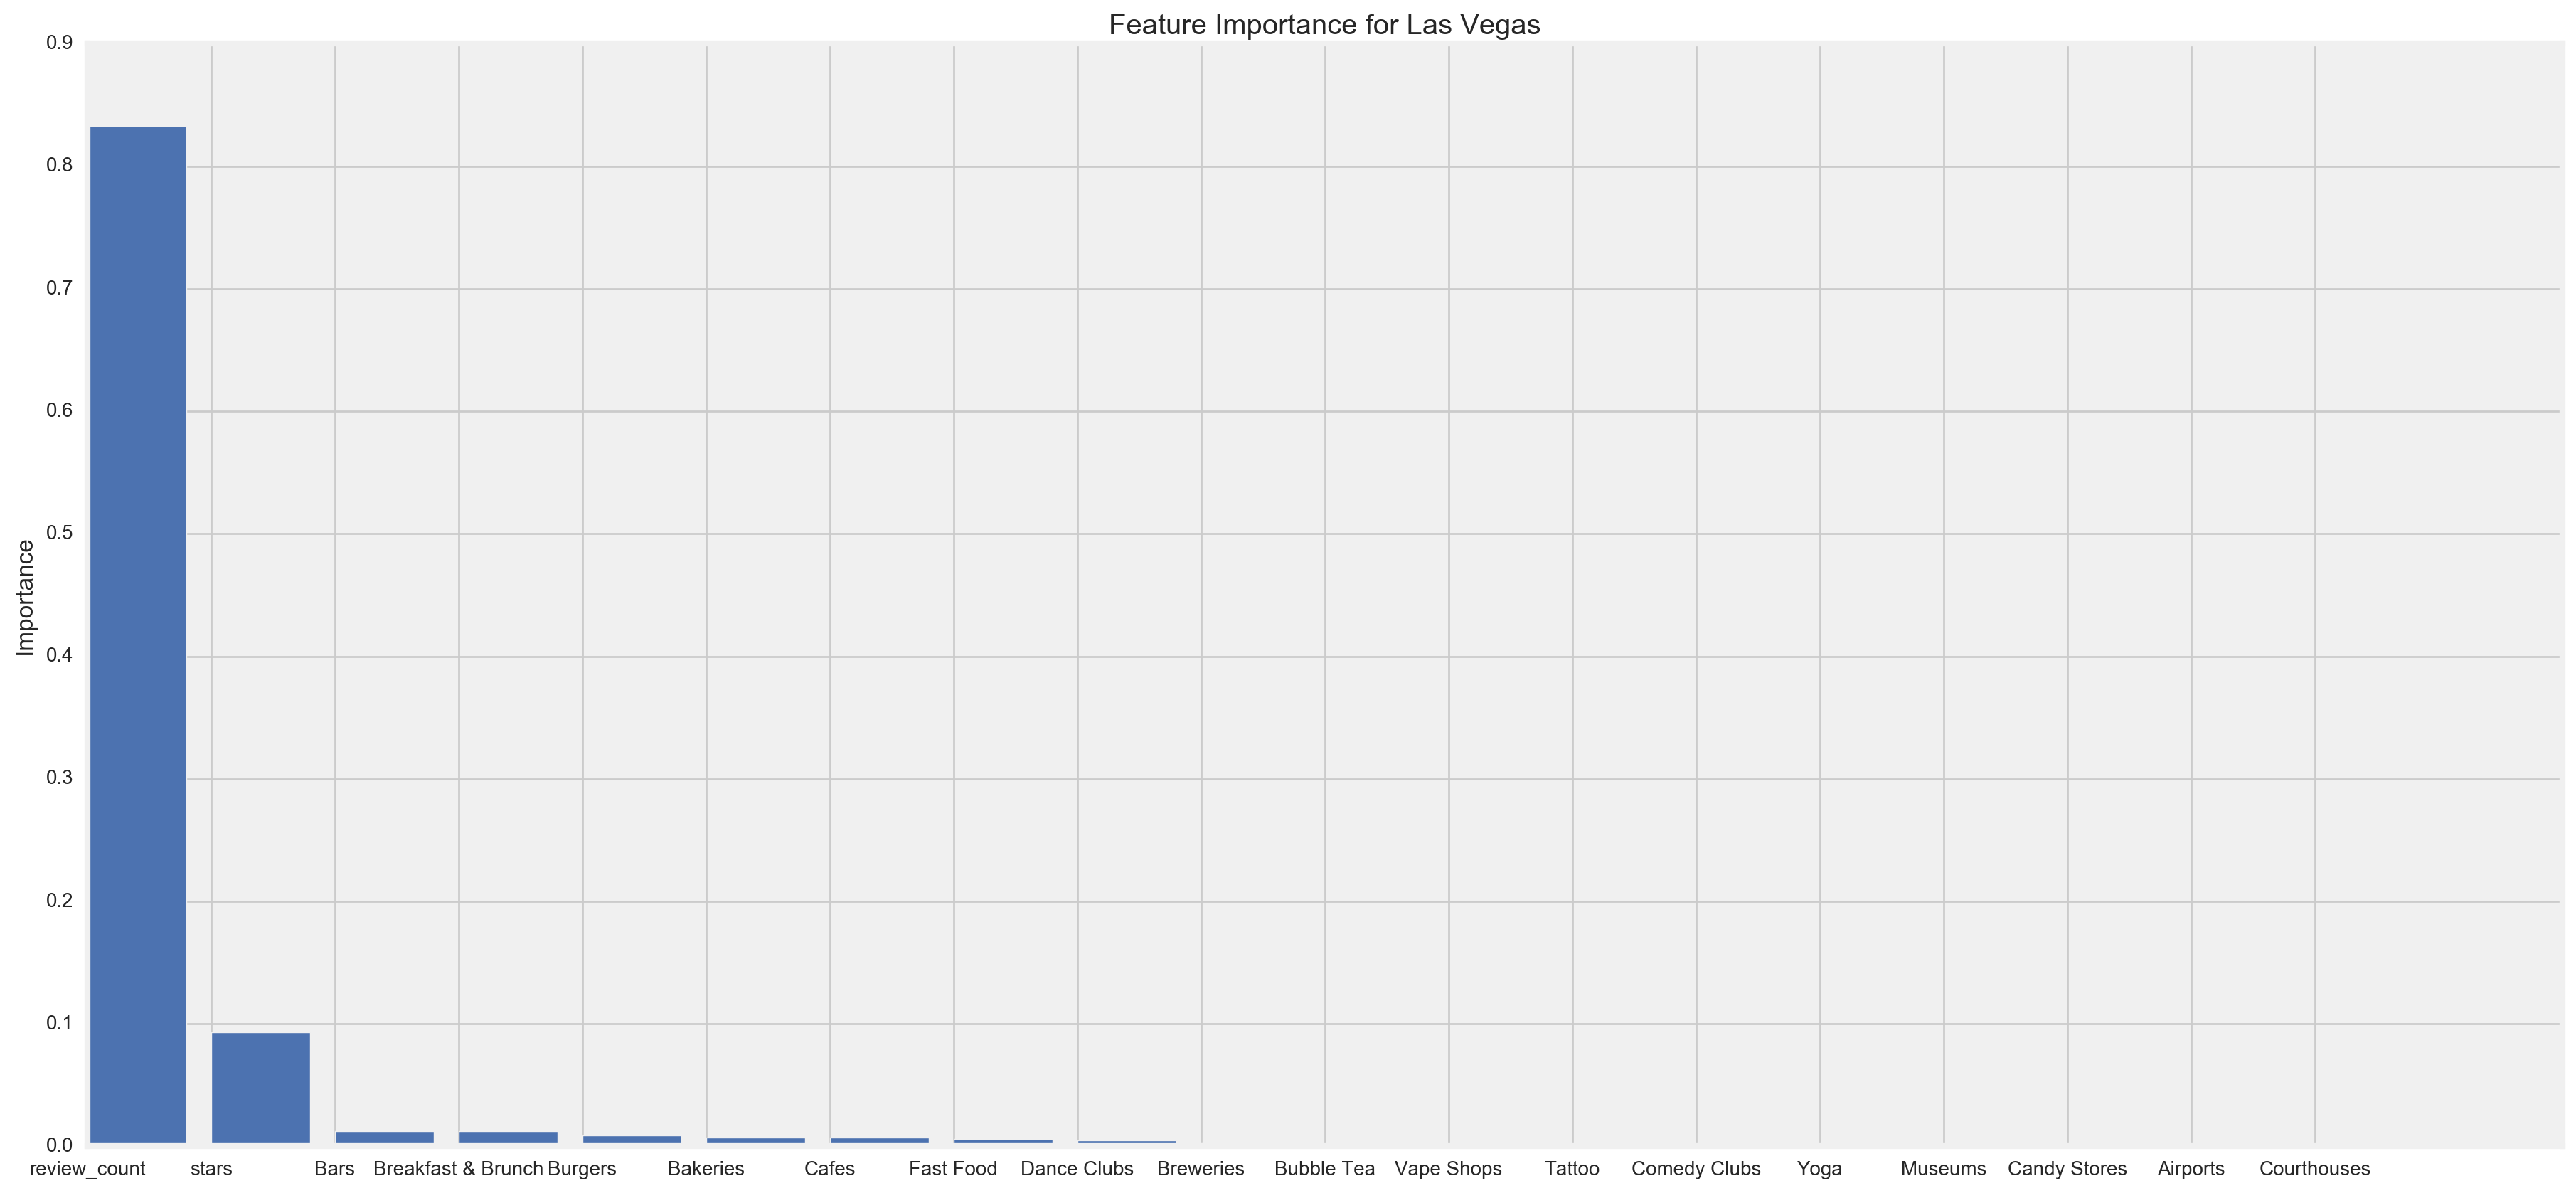

In [104]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(category)), importance)
plt.xticks(np.arange(len(category)), category)
plt.ylabel('Importance')
plt.title('Feature Importance for Las Vegas')

In [ ]:
# category = []
# importance = []

# for feature in feat_imp:
#     category.append(feature[1])
#     importance.append(feature[0])

# plt.figure(figsize=(20,10))
# plt.bar(np.arange(len(category)), importance)
# plt.xticks(np.arange(len(category)), category)
# plt.ylabel('Importance')
# plt.title('Feature Importance for Las Vegas')

According to our analysis above, Review count is clearly the driving factor in the Random Forest classifier for determining wether or not the city is Las Vegas with "Stars" being the second most determining factor. This means that population size (or visitors as well) is the number one determining factor and that the number of stars a place recieves accounts for most of the rest of that determination. individual business categories do not contribute very strongly in the determination process.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [105]:
reviews.head()

,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sEWeeq41k4ohBz4jS_iGRw,tOhOHUAS7XJch7a_HW5Csw,3,EmzaQR5hQlF0WIl24NxAZA,12,2,2008-04-21,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1AqEqmmVHgYCuzcMrF4h2g,2aGafu-x7onydGoDgDfeQQ,0,EmzaQR5hQlF0WIl24NxAZA,2,2,2009-11-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pv82zTlB5Txsu2Pusu__FA,CY4SWiYcUZTWS_T_cGaGPA,4,EmzaQR5hQlF0WIl24NxAZA,9,2,2010-08-16,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jlr3OBS1_Y3Lqa-H3-FR1g,VCKytaG-_YkxmQosH4E0jw,0,EmzaQR5hQlF0WIl24NxAZA,1,4,2010-12-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
reviews['service good'].value_counts()


0    316213
1      6132
2        53
Name: service good, dtype: int64

In [120]:
service_reviews = []
for col in reviews.columns:
    if 'service' in col:
        service_reviews.append(col)
    elif 'staff' in col:
        service_reviews.append(col)
    elif 'friendly' in col:
        service_reviews.append(col)
    elif 'minutes later' in col:
        service_reviews.append(col)
    elif 'long time' in col:
        service_reviews.append(col)
    elif 'right away' in col:
        service_reviews.append(col)

In [204]:
service_reviews

['bottle service',
 'customer service',
 'food service',
 'friendly staff',
 'good service',
 'great service',
 'long time',
 'minutes later',
 'right away',
 'service excellent',
 'service food',
 'service friendly',
 'service good',
 'service great',
 'staff friendly',
 'super friendly',
 'wait staff']

In [123]:
serv = reviews[service_reviews]
    

In [125]:
for i, c in enumerate(serv):
     servdf = serv[(serv.T != 0).any()]

In [139]:
serv_rev_ind = servdf.index.tolist()

In [142]:
serv_rev_df = reviews.iloc[serv_rev_ind]

In [143]:
serv_rev_df.head()

,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
18,tm3vOevmVh6EQlcWNV6Xug,e3LPy75TialrhqsRMH0PYw,0,EmzaQR5hQlF0WIl24NxAZA,0,5,2014-05-21,1,0,0,...,1,0,0,0,0,0,0,0,0,0
25,WvwZ2JPGOXFS3_Wl993uRw,4jN14TydtkSBgJ868LwcwA,1,SiwN7f0N4bs4ZtPc4yPgiA,0,4,2007-07-24,2,0,0,...,0,0,0,0,0,0,0,0,0,0
42,N_o8Yhuw1afXs20jBcU9Sw,t6lAiiw3c9bQByChPHOy2Q,1,e5kc0CQ4R-PCCDgb274gSg,0,5,2007-01-17,0,0,0,...,0,0,0,1,0,0,0,0,0,1
43,N-D-d1Z4UybdlkK1HxlNPA,n1c9Qyb-A9gVjtOCbWz4xw,0,e5kc0CQ4R-PCCDgb274gSg,0,4,2007-02-25,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,fkZ_t7co7VxO2jPI9bD5bg,c_4rkfmyc6DgaKRT8bC7kw,2,e5kc0CQ4R-PCCDgb274gSg,0,4,2008-06-14,3,0,0,...,0,0,0,1,0,0,0,0,0,0


In [144]:
exclude = reviews.index.isin(service_reviews)

In [145]:
non_serv_rev_df = reviews[~exclude]

In [148]:
non_serv_rev_df.head()

,user_id,review_id,votes.cool,business_id,votes.funny,stars,date,votes.useful,10 minutes,15 minutes,...,service great,staff friendly,super friendly,sweet potato,tasted like,time vegas,try place,ve seen,ve tried,wait staff
0,o_LCYay4uo5N4eq3U5pbrQ,biEOCicjWlibF26pNLvhcw,0,EmzaQR5hQlF0WIl24NxAZA,0,3,2007-09-14,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,sEWeeq41k4ohBz4jS_iGRw,tOhOHUAS7XJch7a_HW5Csw,3,EmzaQR5hQlF0WIl24NxAZA,12,2,2008-04-21,3,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1AqEqmmVHgYCuzcMrF4h2g,2aGafu-x7onydGoDgDfeQQ,0,EmzaQR5hQlF0WIl24NxAZA,2,2,2009-11-16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pv82zTlB5Txsu2Pusu__FA,CY4SWiYcUZTWS_T_cGaGPA,4,EmzaQR5hQlF0WIl24NxAZA,9,2,2010-08-16,6,0,0,...,0,0,0,0,0,0,0,0,0,0
4,jlr3OBS1_Y3Lqa-H3-FR1g,VCKytaG-_YkxmQosH4E0jw,0,EmzaQR5hQlF0WIl24NxAZA,1,4,2010-12-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
user_serv = serv_rev_df.groupby(['user_id'])['stars'].mean()

In [157]:
user_non_ser = non_serv_rev_df.groupby(['user_id'])['stars'].mean()

In [158]:
user_serv.mean()

3.859400969136408

In [159]:
user_non_ser.mean()

3.746170453510973

In [168]:
user_serv = serv_rev_df.groupby(['user_id'])['stars'].count()

In [167]:
user_non_ser = non_serv_rev_df.groupby(['user_id'])['stars'].count()

In [169]:
user_serv.mean()

1.4701246689490344

In [170]:
user_non_ser.mean()

2.2356767402188535

In [180]:
bus_serv = serv_rev_df.groupby(['business_id'])[['stars']].mean()

In [181]:
bus_non_serv = non_serv_rev_df.groupby(['business_id'])[['stars']].mean()

In [173]:
bus_serv.mean()

3.654237817857158

In [175]:
bus_non_serv.mean()

3.4827931968966332

In [177]:
bus_serv.head()

business_id
--jFTZmywe7StuZ2hEjxyA    3.000000
-0HGqwlfw3I8nkJyMHxAsQ    3.000000
-1bOb2izeJBZjHC7NWxiPA    4.024390
-2_O3_WKgO5In5XO5extNQ    4.666667
-2k6VTGx1M93hscEdhx37A    4.200000
Name: stars, dtype: float64

In [182]:
bus_serv.rename(columns={"stars":"service rating"}, inplace=True)

In [194]:
bus_serv.head()

,service rating
business_id,
--jFTZmywe7StuZ2hEjxyA,3.000000
-0HGqwlfw3I8nkJyMHxAsQ,3.000000
-1bOb2izeJBZjHC7NWxiPA,4.024390
-2_O3_WKgO5In5XO5extNQ,4.666667
-2k6VTGx1M93hscEdhx37A,4.200000


In [240]:
bus_non_serv.rename(columns={"service rating":"non service rating"}, inplace=True)

In [241]:
bus_non_serv.head()

,non service rating
business_id,
--jFTZmywe7StuZ2hEjxyA,3.400000
-0HGqwlfw3I8nkJyMHxAsQ,3.000000
-0VK5Z1BfUHUYq4PoBYNLw,3.750000
-0bUDim5OGuv8R0Qqq6J4A,2.142857
-1bOb2izeJBZjHC7NWxiPA,4.000000


In [242]:
stars_bus= reviews.groupby("business_id")[["stars"]].mean()

In [243]:
ratings = pd.merge(stars_bus, bus_serv, how="inner", left_index=True, right_index=True)
ratings = pd.merge(ratings, bus_non_serv, how="inner", left_index=True, right_index=True)


In [244]:
ratings.head()

,stars,service rating,non service rating
business_id,,,
--jFTZmywe7StuZ2hEjxyA,3.400000,3.000000,3.400000
-0HGqwlfw3I8nkJyMHxAsQ,3.000000,3.000000,3.000000
-1bOb2izeJBZjHC7NWxiPA,4.000000,4.024390,4.000000
-2_O3_WKgO5In5XO5extNQ,4.900000,4.666667,4.900000
-2k6VTGx1M93hscEdhx37A,4.384615,4.200000,4.384615


In [245]:
rev_tot = pd.concat([reviews['business_id'],reviews._get_numeric_data()], axis=1)

In [246]:
rev_tot.drop('stars',axis=1, inplace=True)

In [247]:
rev_cols_all = rev_tot.columns

In [248]:
rev_tot = rev_tot.groupby(['business_id'])[rev_cols_all.drop(u'business_id')].mean()

In [249]:
rev_tot.shape

(4132, 103)

In [250]:
review_df = pd.merge(rev_tot,ratings,how="inner", left_index=True, right_index=True)

In [257]:
review_df.columns

Index([u'votes.cool', u'votes.funny', u'votes.useful', u'10 minutes',
       u'15 minutes', u'20 minutes', u'30 minutes', u'bar food',
       u'beer selection', u'best ve',
       ...
       u'sweet potato', u'tasted like', u'time vegas', u'try place',
       u've seen', u've tried', u'wait staff', u'stars', u'service rating',
       u'non service rating'],
      dtype='object', length=106)

In [304]:
y_serv = review_df['service rating']
y_non_serv = review_df['non service rating']
y_star = review_df['stars']

In [305]:
X = review_df.drop(['service rating','non service rating','stars'], axis=1)

In [306]:
X = X._get_numeric_data()

In [307]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5,shuffle=True)

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.cross_validation import cross_val_score, KFold, train_test_split

In [308]:
alpha = np.linspace(0.0001, 1000,100)
la1 = linear_model.LassoCV(alphas=alpha,cv=10)

In [309]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(
                                    X, y_serv, random_state=42, test_size=.20)

In [310]:
X.shape

(3419, 103)

In [311]:
model_lasso_s= la1.fit(Xs_train,ys_train)
y_test_hat = model_lasso_s.predict(Xs_test)

In [312]:
mean_squared_error(ys_test, y_test_hat)

0.69622732836157186

In [314]:
x_cols = X.columns

In [317]:
features = sorted(zip(x_cols, model_lasso_s.coef_), key=(lambda x: x[1]), reverse=True)

In [320]:
features

[('definitely come', 5.0468854088700894),
 ('food amazing', 3.6730145917702219),
 ('service excellent', 3.3963260756455798),
 ('highly recommend', 3.3672799887165685),
 ('definitely recommend', 3.3124534076331829),
 ('love place', 3.0519953031100444),
 ('great service', 2.539048832660443),
 ('super friendly', 2.4344292880614287),
 ('service great', 2.1624863396782152),
 ('best ve', 1.7649960594214065),
 ('great experience', 1.7456307527461186),
 ('place just', 1.6101279255638101),
 ('staff friendly', 1.5963284068266661),
 ('food delicious', 1.5724930915715885),
 ('just right', 1.4304007800147938),
 ('friendly staff', 1.3347595804651573),
 ('really enjoyed', 1.3293862705714896),
 ('really nice', 1.3272740918003598),
 ('really good', 1.1222160358674875),
 ('make sure', 1.0338645552167505),
 ('great place', 1.0042681533963302),
 ('place good', 0.88750840567395428),
 ('feel like', 0.81086875237871181),
 ('great time', 0.72116714821972971),
 ('las vegas', 0.72033626909495174),
 ('time vegas

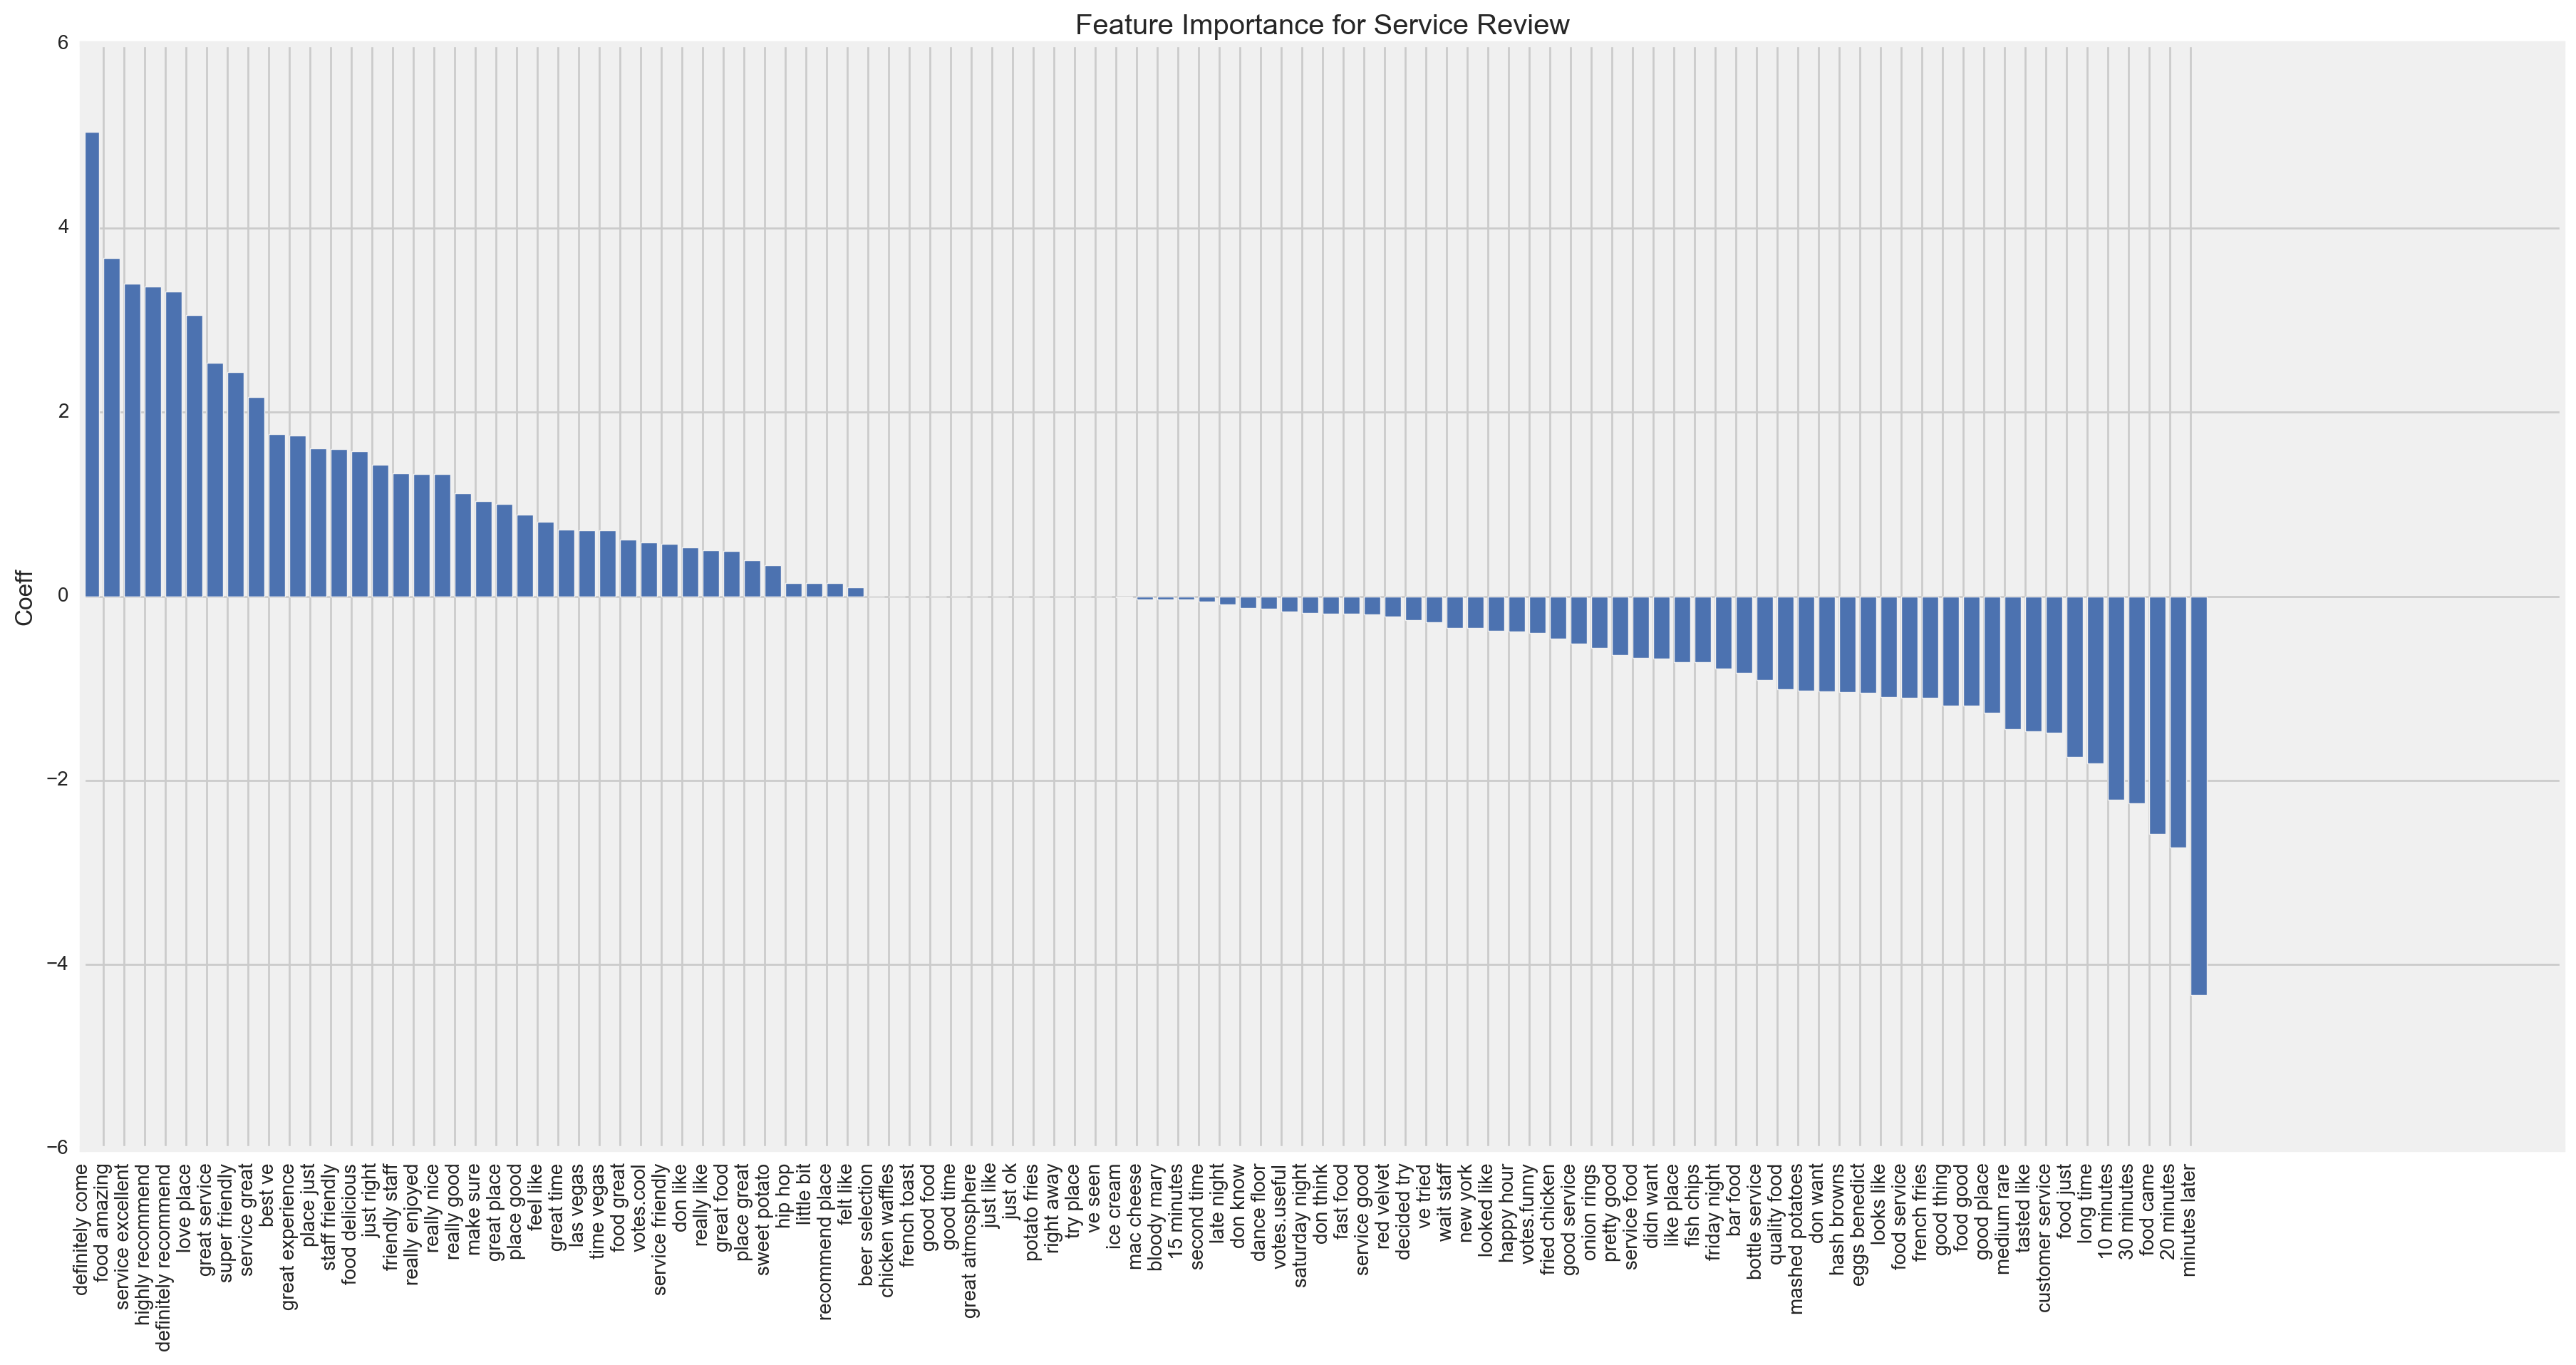

In [324]:
category = []
importance = []

for feature in features:
    category.append(feature[0])
    importance.append(feature[1])

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(category)), importance)
plt.xticks(np.arange(len(category)), category, rotation='vertical')
plt.ylabel('Coeff')
plt.title('Feature Importance for Service Review')

We can see in the plot above that some coeffiecents greatly improve the service rating (and they are the ones we would expect such as 'service excellent; 'service great' and 'super friendly') while others are eliminated entirely while bad service variables relate to a bad service score

In [286]:
# test for service score
for train, test in kfold.split(X,y_serv):
    Xs_train, ys_train = X.iloc[train], y_serv.iloc[train]
    Xs_test, ys_test = X.iloc[test], y_serv.iloc[test]
    lr = LinearRegression()
    lr.fit(Xs_train,ys_train)
    
    print lr.score(Xs_test, ys_test), lr.score(Xs_train,ys_train)
    #sklearn poly

0.271836237464 0.405338034426
0.382242065585 0.384940247278
0.378948162451 0.385027537594
0.305886103398 0.397452142441
0.279447442061 0.407060050802


Clearly the Lasso Regression overfits less than the kfold linear regression and provides better esimatiors.

In [287]:
Xn_train, Xn_test, yn_train, yn_test = train_test_split(
                                    X, y_non_serv, random_state=42, test_size=.20)

In [289]:
model_lasso_ns = la1.fit(Xn_train,yn_train)
y_test_hat_n = model.predict(Xn_test)

In [290]:
mean_squared_error(yn_test, y_test_hat_n)

0.34495228482096901

In [325]:
for train, test in kfold.split(X,y_non_serv):
    Xn_train, yn_train = X.iloc[train], y_non_serv.iloc[train]
    Xn_test, yn_test = X.iloc[test], y_non_serv.iloc[test]
    lr = LinearRegression()
    lr.fit(Xn_train,yn_train)
    
    print lr.score(Xn_test, yn_test), lr.score(Xn_train,yn_train)

0.525382191594 0.561547535321
0.499677458306 0.567192819899
0.519406096137 0.56273417233
0.535641141679 0.557345855054
0.469389726513 0.571912938092


for the non service rating the Kfold to linear regression fit works better than the Lasso Regression

In [326]:
features = sorted(zip(x_cols, lr.coef_), key=(lambda x: x[1]), reverse=True)

In [327]:
features

[('definitely come', 4.3259890425110568),
 ('highly recommend', 3.6275512408424211),
 ('best ve', 3.603674972770802),
 ('food amazing', 3.4432848384683932),
 ('love place', 3.2958682346132253),
 ('definitely recommend', 2.8222710147934236),
 ('service excellent', 2.7629692736040758),
 ('time vegas', 2.5776976975951995),
 ('great experience', 2.4390452461893743),
 ('place great', 2.3992485580929506),
 ('just right', 1.9622564702091883),
 ('food delicious', 1.9512457916067691),
 ('super friendly', 1.5652135062668175),
 ('try place', 1.5609187483874296),
 ('great place', 1.5149920616504078),
 ('really enjoyed', 1.31806621338953),
 ('sweet potato', 1.1435458046148392),
 ('great time', 1.1116061699283681),
 ('really nice', 1.0520207453937918),
 ('really like', 0.98983165152272279),
 ('good time', 0.98739029320006),
 ('feel like', 0.94241091653980413),
 ('ve tried', 0.93342968830229056),
 ('great food', 0.91273297325807778),
 ('really good', 0.81601118048810251),
 ('service great', 0.8094095

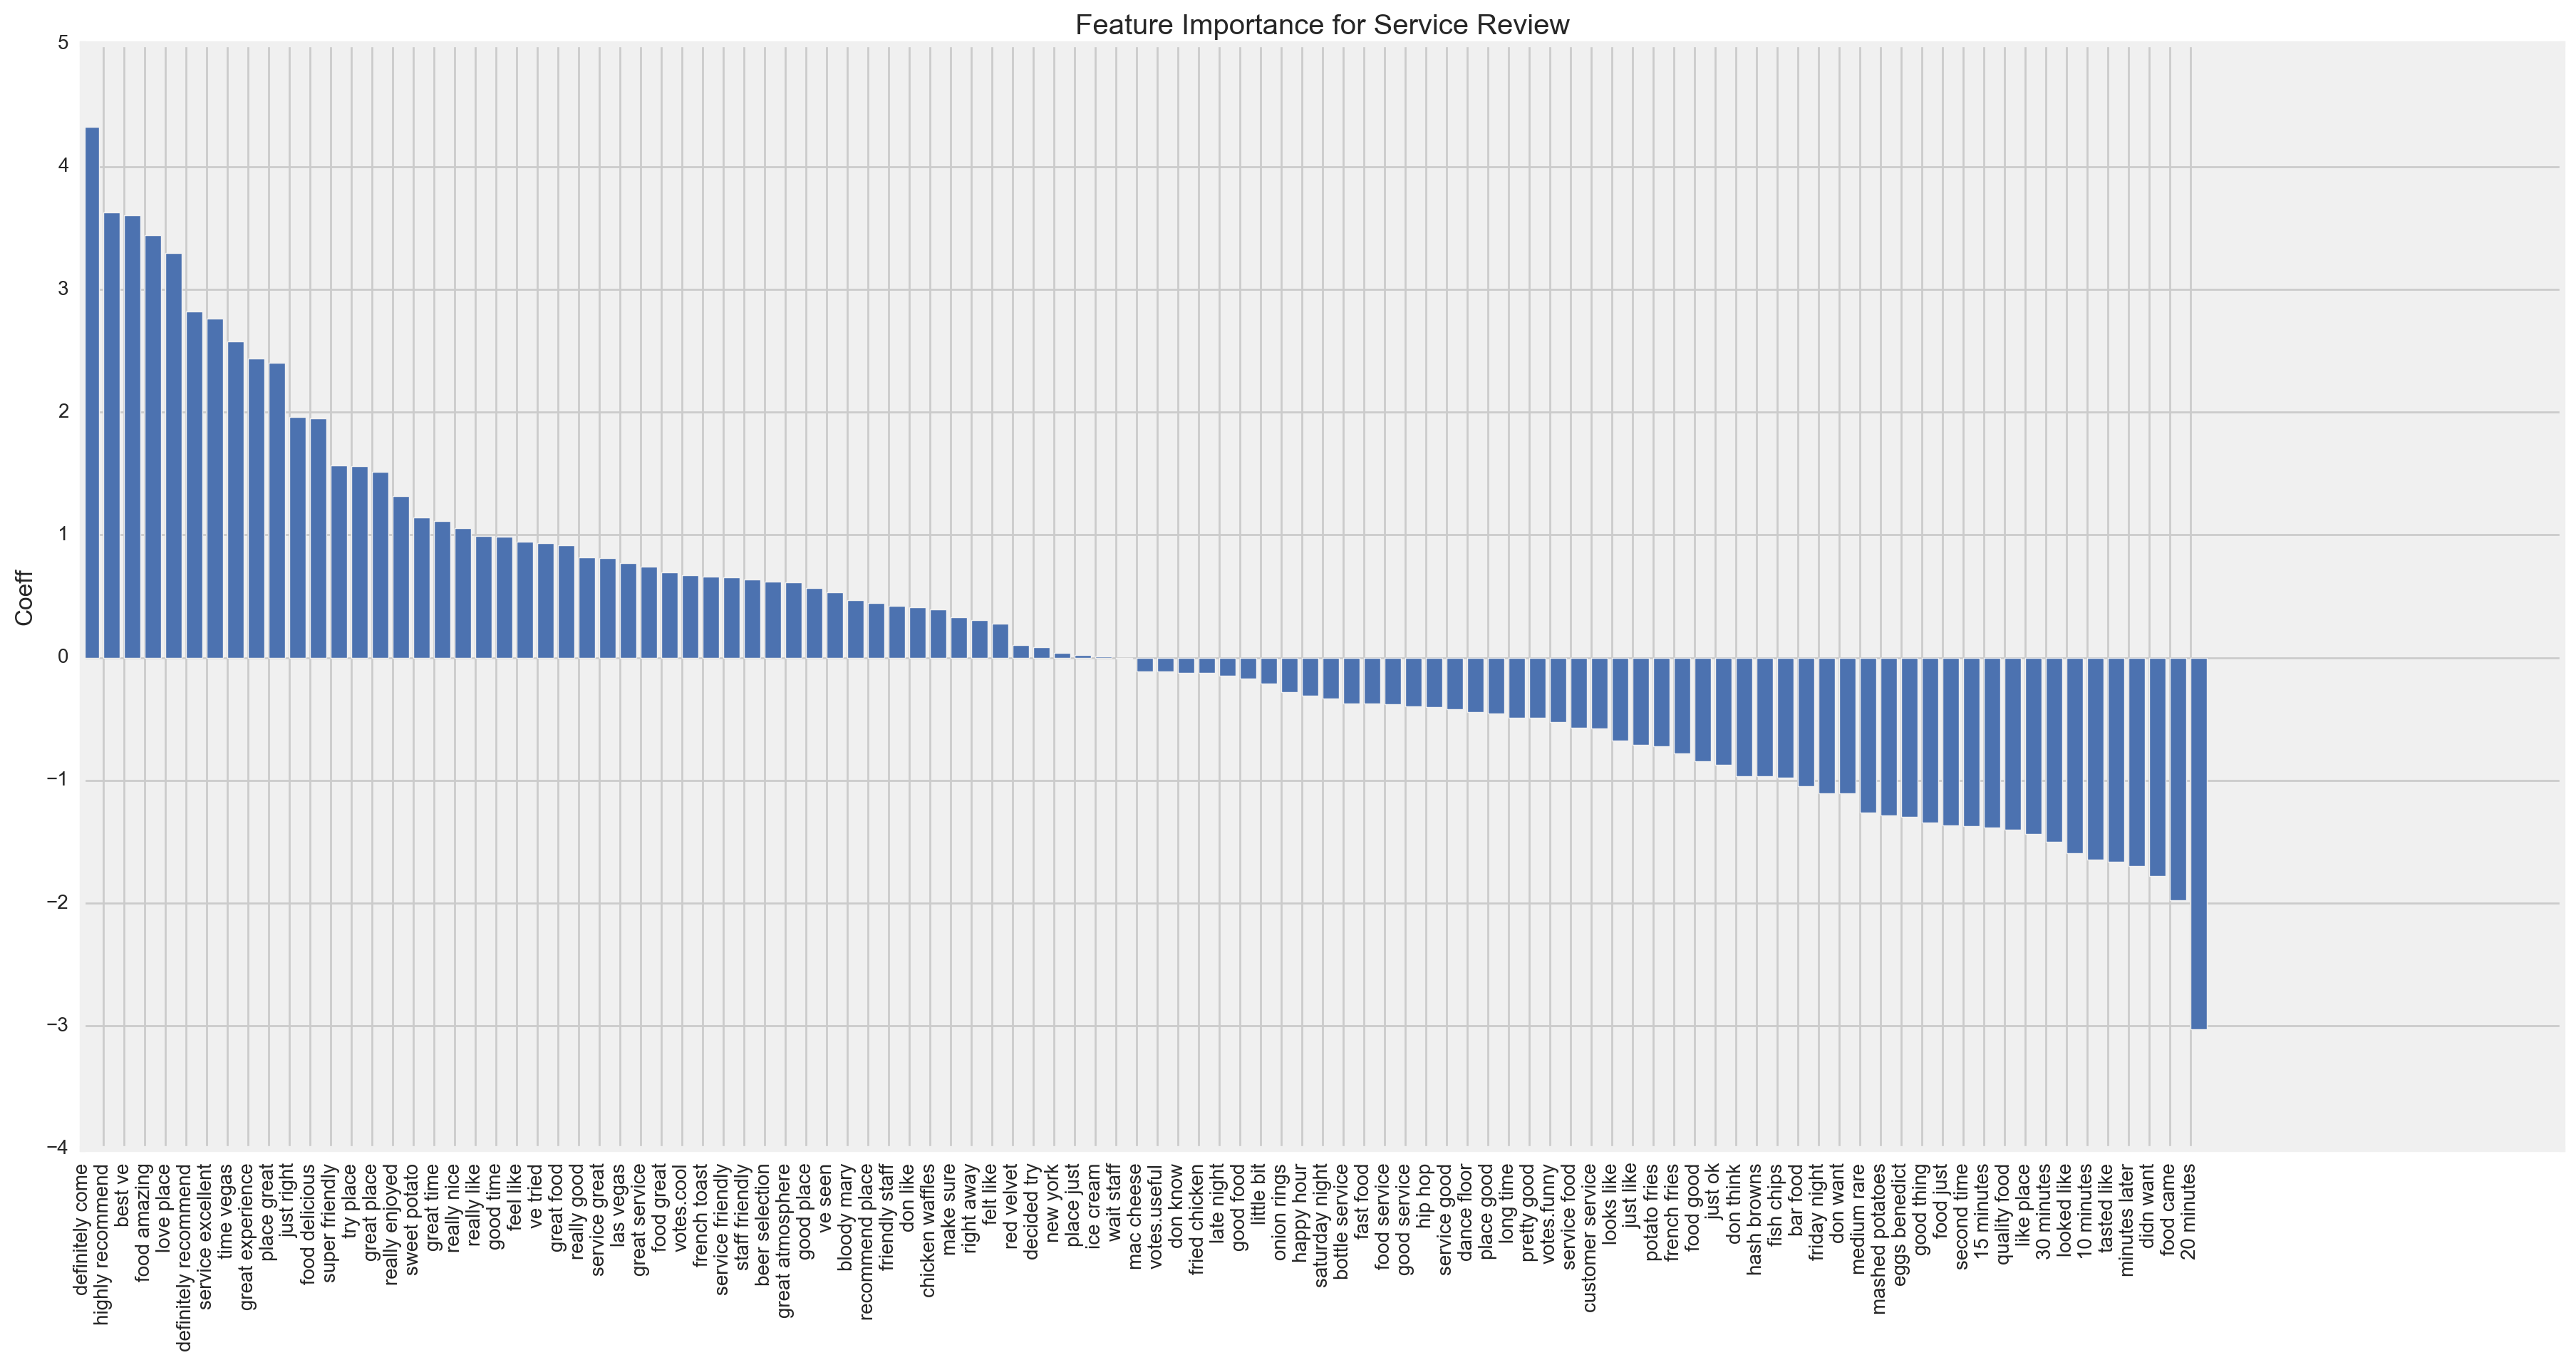

In [328]:
category = []
importance = []

for feature in features:
    category.append(feature[0])
    importance.append(feature[1])

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(category)), importance)
plt.xticks(np.arange(len(category)), category, rotation='vertical')
plt.ylabel('Coeff')
plt.title('Feature Importance for Service Review')

Because this model is targeting a non service component and also uses linear regression as opposed to Lasso, we see that almost all components are used. Assitionally, the Service related features are eighted less heavily than in the service based regression.


I do believe these are two different types of rating based on the feature impact and ranking I see in the two graphs. There are a few ways that the regression could be improved and iterated on. 

    - First the count of reviews on a place are not normalized around Service Related and non Service Related. There were more non service reviews than service reviews
    - Second, Reviews can be both service related and non service related, The service related scores are influenced by the service, but hardly soley dependent on it
    - Third, each business did not have the same number of reviews. A place with a few yelp reviews is therefore at the mercy of those few Users. In some cases there may be one service review for a business that throws off the regression

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


In [329]:
users.shape

(144206, 21)

In [330]:
users.dtypes

yelping_since           object
compliments.plain      float64
review_count             int64
compliments.cute       float64
compliments.writer     float64
fans                     int64
compliments.note       float64
compliments.hot        float64
compliments.cool       float64
compliments.profile    float64
average_stars          float64
compliments.more       float64
elite                   object
name                    object
user_id                 object
votes.cool               int64
compliments.list       float64
votes.funny              int64
compliments.photos     float64
compliments.funny      float64
votes.useful             int64
dtype: object

In [331]:
users.head()

,yelping_since,compliments.plain,review_count,compliments.cute,compliments.writer,fans,compliments.note,compliments.hot,compliments.cool,compliments.profile,...,compliments.more,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful
0,2004-10,959.0,1274,206.0,327.0,1179,611.0,1094.0,1642.0,116.0,...,134.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Jeremy,rpOyqD_893cqmDAtJLbdog,11093,38.0,7681,330.0,580.0,14199
1,2004-10,89.0,442,23.0,24.0,100,83.0,101.0,145.0,9.0,...,19.0,"[2005, 2006, 2007, 2008, 2009, 2010, 2011, 201...",Michael,4U9kSBLuBDU391x6bxU-YA,732,4.0,908,24.0,120.0,1483
2,2004-10,2.0,66,2.0,2.0,4,1.0,1.0,1.0,NaN,...,1.0,[2005],Katherine,SIBCL7HBkrP4llolm4SC2A,13,NaN,11,NaN,NaN,34
3,2004-10,5.0,101,1.0,3.0,7,3.0,5.0,4.0,1.0,...,2.0,[],Nader,UTS9XcT14H2ZscRIf0MYHQ,49,NaN,53,1.0,8.0,243
4,2004-10,104.0,983,82.0,17.0,78,85.0,265.0,212.0,9.0,...,16.0,"[2005, 2006, 2007, 2008, 2010, 2011, 2012]",Helen,ZWOj6LmzwGvMDh-A85EOtA,1928,3.0,1109,57.0,70.0,2404


In [332]:
users.elite.value_counts()

[]                                                        127583
[2015]                                                      2402
[2012, 2013, 2014, 2015]                                    1578
[2014, 2015]                                                1471
[2013, 2014, 2015]                                          1165
[2011, 2012, 2013, 2014, 2015]                               999
[2010, 2011, 2012, 2013, 2014, 2015]                         866
[2009, 2010, 2011, 2012, 2013, 2014, 2015]                   452
[2012, 2013, 2014]                                           412
[2012, 2013]                                                 393
[2012]                                                       384
[2010, 2011]                                                 368
[2011, 2012]                                                 354
[2010, 2011, 2012]                                           337
[2009, 2010]                                                 305
[2010]                   

In [333]:
users['num_years_active'] = users['yelping_since'].apply(lambda x: int(x[:4])) # take the date to see how many years the
#user has been online

In [336]:
users.groupby(['yelping_since']).count().tail() #see that data is cut off at 2015 so use this as the base number for total years

,compliments.plain,review_count,compliments.cute,compliments.writer,fans,compliments.note,compliments.hot,compliments.cool,compliments.profile,average_stars,...,elite,name,user_id,votes.cool,compliments.list,votes.funny,compliments.photos,compliments.funny,votes.useful,num_years_active
yelping_since,,,,,,,,,,,,,,,,,,,,,
2015-08,35,852,0,14,852,16,23,16,0,852,...,852,852,852,852,0,852,9,10,852,852
2015-09,23,626,0,10,626,12,10,15,2,626,...,626,626,626,626,1,626,10,15,626,626
2015-10,22,622,0,7,622,11,12,11,3,622,...,622,622,622,622,1,622,8,10,622,622
2015-11,7,333,1,3,333,6,5,6,0,333,...,333,333,333,333,0,333,1,4,333,333
2015-12,3,214,0,2,214,1,1,1,0,214,...,214,214,214,214,0,214,1,3,214,214


In [338]:
#change the num yeas active into an int
users['num_years_active'] = users['num_years_active'].apply(lambda x: 2015-x)

In [340]:
users.num_years_active.unique() #looks correct 2015 - 2004 

array([11,  7,  6,  5,  4,  3,  2,  1,  0,  8, 10,  9])

In [352]:
users['elite_binary'] = users['elite'].apply(lambda x: 0 if x == '[]' else 1) #wanted to return len list but did a string count

In [353]:
users.elite_binary.unique()

array([1, 0])

In [355]:
users.elite_binary.value_counts(0)

0    127583
1     16623
Name: elite_binary, dtype: int64

In [356]:
users.drop(['name','user_id', 'yelping_since', 'elite'], axis=1, inplace=True) #get rid of unecessary columns

In [357]:
users.dtypes

compliments.plain      float64
review_count             int64
compliments.cute       float64
compliments.writer     float64
fans                     int64
compliments.note       float64
compliments.hot        float64
compliments.cool       float64
compliments.profile    float64
average_stars          float64
compliments.more       float64
votes.cool               int64
compliments.list       float64
votes.funny              int64
compliments.photos     float64
compliments.funny      float64
votes.useful             int64
num_years_active         int64
years_elite              int64
elite_binary             int64
dtype: object

In [358]:
users.isnull().sum() # need to fill in the null Values notice all are compliments. 

compliments.plain       97172
review_count                0
compliments.cute       131073
compliments.writer     110984
fans                        0
compliments.note       104334
compliments.hot        112458
compliments.cool       103137
compliments.profile    131838
average_stars               0
compliments.more       119140
votes.cool                  0
compliments.list       137026
votes.funny                 0
compliments.photos     125447
compliments.funny      113594
votes.useful                0
num_years_active            0
years_elite                 0
elite_binary                0
dtype: int64

In [386]:
null_cols = []
for col in users.columns:
    if 'compliments' in col:
        null_cols.append(col)

In [387]:
null_cols

['compliments.plain',
 'compliments.cute',
 'compliments.writer',
 'compliments.note',
 'compliments.hot',
 'compliments.cool',
 'compliments.profile',
 'compliments.more',
 'compliments.list',
 'compliments.photos',
 'compliments.funny']

In [364]:
users_copy = users.copy() #dont want to have to re run everything if this fails

In [365]:
for c in null_cols:
    users_copy[c].fillna(0, inplace=True)

In [367]:
users_copy.isnull().sum()

compliments.plain      0
review_count           0
compliments.cute       0
compliments.writer     0
fans                   0
compliments.note       0
compliments.hot        0
compliments.cool       0
compliments.profile    0
average_stars          0
compliments.more       0
votes.cool             0
compliments.list       0
votes.funny            0
compliments.photos     0
compliments.funny      0
votes.useful           0
num_years_active       0
years_elite            0
elite_binary           0
dtype: int64

In [410]:
X_u = users_copy.drop(['elite_binary','years_elite'], axis=1)

In [411]:
y_u = users_copy['elite_binary']

In [412]:
knn_uni_u = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uni_u.fit(X_u, y_u)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [413]:
accs, mean_acc = accuracy_crossvalidator(X_u, y_u, knn_uni_n3)
print accs,mean_acc

[0.94761112266833092, 0.94705637611816107, 0.9487899590874419, 0.94927184466019421, 0.94909847434119277] 0.948365555375


In [388]:
null_cols.append('elite_binary')
null_cols.append('review_count')
#null_cols.append('votes')
nu

#X_unc = users_copy.drop(count_cols, axis=1) ,','votes'

In [401]:
null_cols.append('votes.cool')
null_cols.append('votes.useful')
null_cols.append('votes.funny')

In [406]:
count_cols = list(null_cols)

In [407]:
# count_cols.append('votes.cool')
# count_cols.append('votes.useful')
# count_cols.append('votes.funny')


#,'votes.useful','votes.funny')

In [408]:
X_unc = users_copy.drop(count_cols, axis=1)

In [409]:
X_unc.columns

Index([u'fans', u'average_stars', u'num_years_active', u'years_elite'], dtype='object')

In [415]:
X_unc.drop('years_elite', axis=1, inplace=True)

In [416]:
knn_uni_un = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_uni_un.fit(X_unc, y_u)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [419]:
accs, mean_acc = accuracy_crossvalidator(X_unc, y_u, knn_uni_n3)
print accs,mean_acc

[0.93301435406698563, 0.92940850149088139, 0.93249427917620142, 0.93221220527045767, 0.93179611650485439] 0.931785091302


we get pretty strong results with the K-neighborsboth with and without the count columns but I believe the result could be improved with the random tree classifier. clearly the fans section and num years active are what drive the classification of being elite. I cant imagine you become elite without many fans

In [429]:
rf = RandomForestClassifier()

scores_rf = cross_val_score(rf, X_u, y_u, cv=10, n_jobs=-1)
print scores_rf

print np.mean(scores_rf) 

Xu_train, Xu_test, yu_train, yu_test = train_test_split(X_u, y_u, train_size=.8)
rf.fit(Xu_train, yu_train)

yu_pred = rf.predict(Xu_test)

print accuracy_score(yu_test, yu_pred)
print precision_score(yu_test, yu_pred)
print recall_score(yu_test, yu_pred)
print f1_score(yu_test, yu_pred)

x_cols = X_u.columns
feat_imp = sorted(zip(rf.feature_importances_, x_cols), reverse=True)
feat_imp

[ 0.95721814  0.95673277  0.95888226  0.95638003  0.95721221  0.95839112
  0.95804438  0.95672677  0.95596394  0.95631068]
0.957186229776
0.957423202274
0.850184749748
0.763960156957
0.804769475358


[(0.20159108446596621, 'votes.useful'),
 (0.17574052290084333, 'review_count'),
 (0.14923627450881236, 'compliments.cool'),
 (0.10151633960257003, 'votes.cool'),
 (0.07917610531852759, 'votes.funny'),
 (0.075850143729373196, 'compliments.hot'),
 (0.036672595225836442, 'compliments.writer'),
 (0.033504420643778135, 'average_stars'),
 (0.026431245303450292, 'fans'),
 (0.023814289873655265, 'compliments.note'),
 (0.020937578866542333, 'compliments.plain'),
 (0.020518188727614736, 'num_years_active'),
 (0.014165296001312758, 'compliments.funny'),
 (0.012395249424699517, 'compliments.more'),
 (0.010128144716018552, 'compliments.photos'),
 (0.0085791950098814997, 'compliments.profile'),
 (0.0061549739880292177, 'compliments.cute'),
 (0.0035883516930886108, 'compliments.list')]

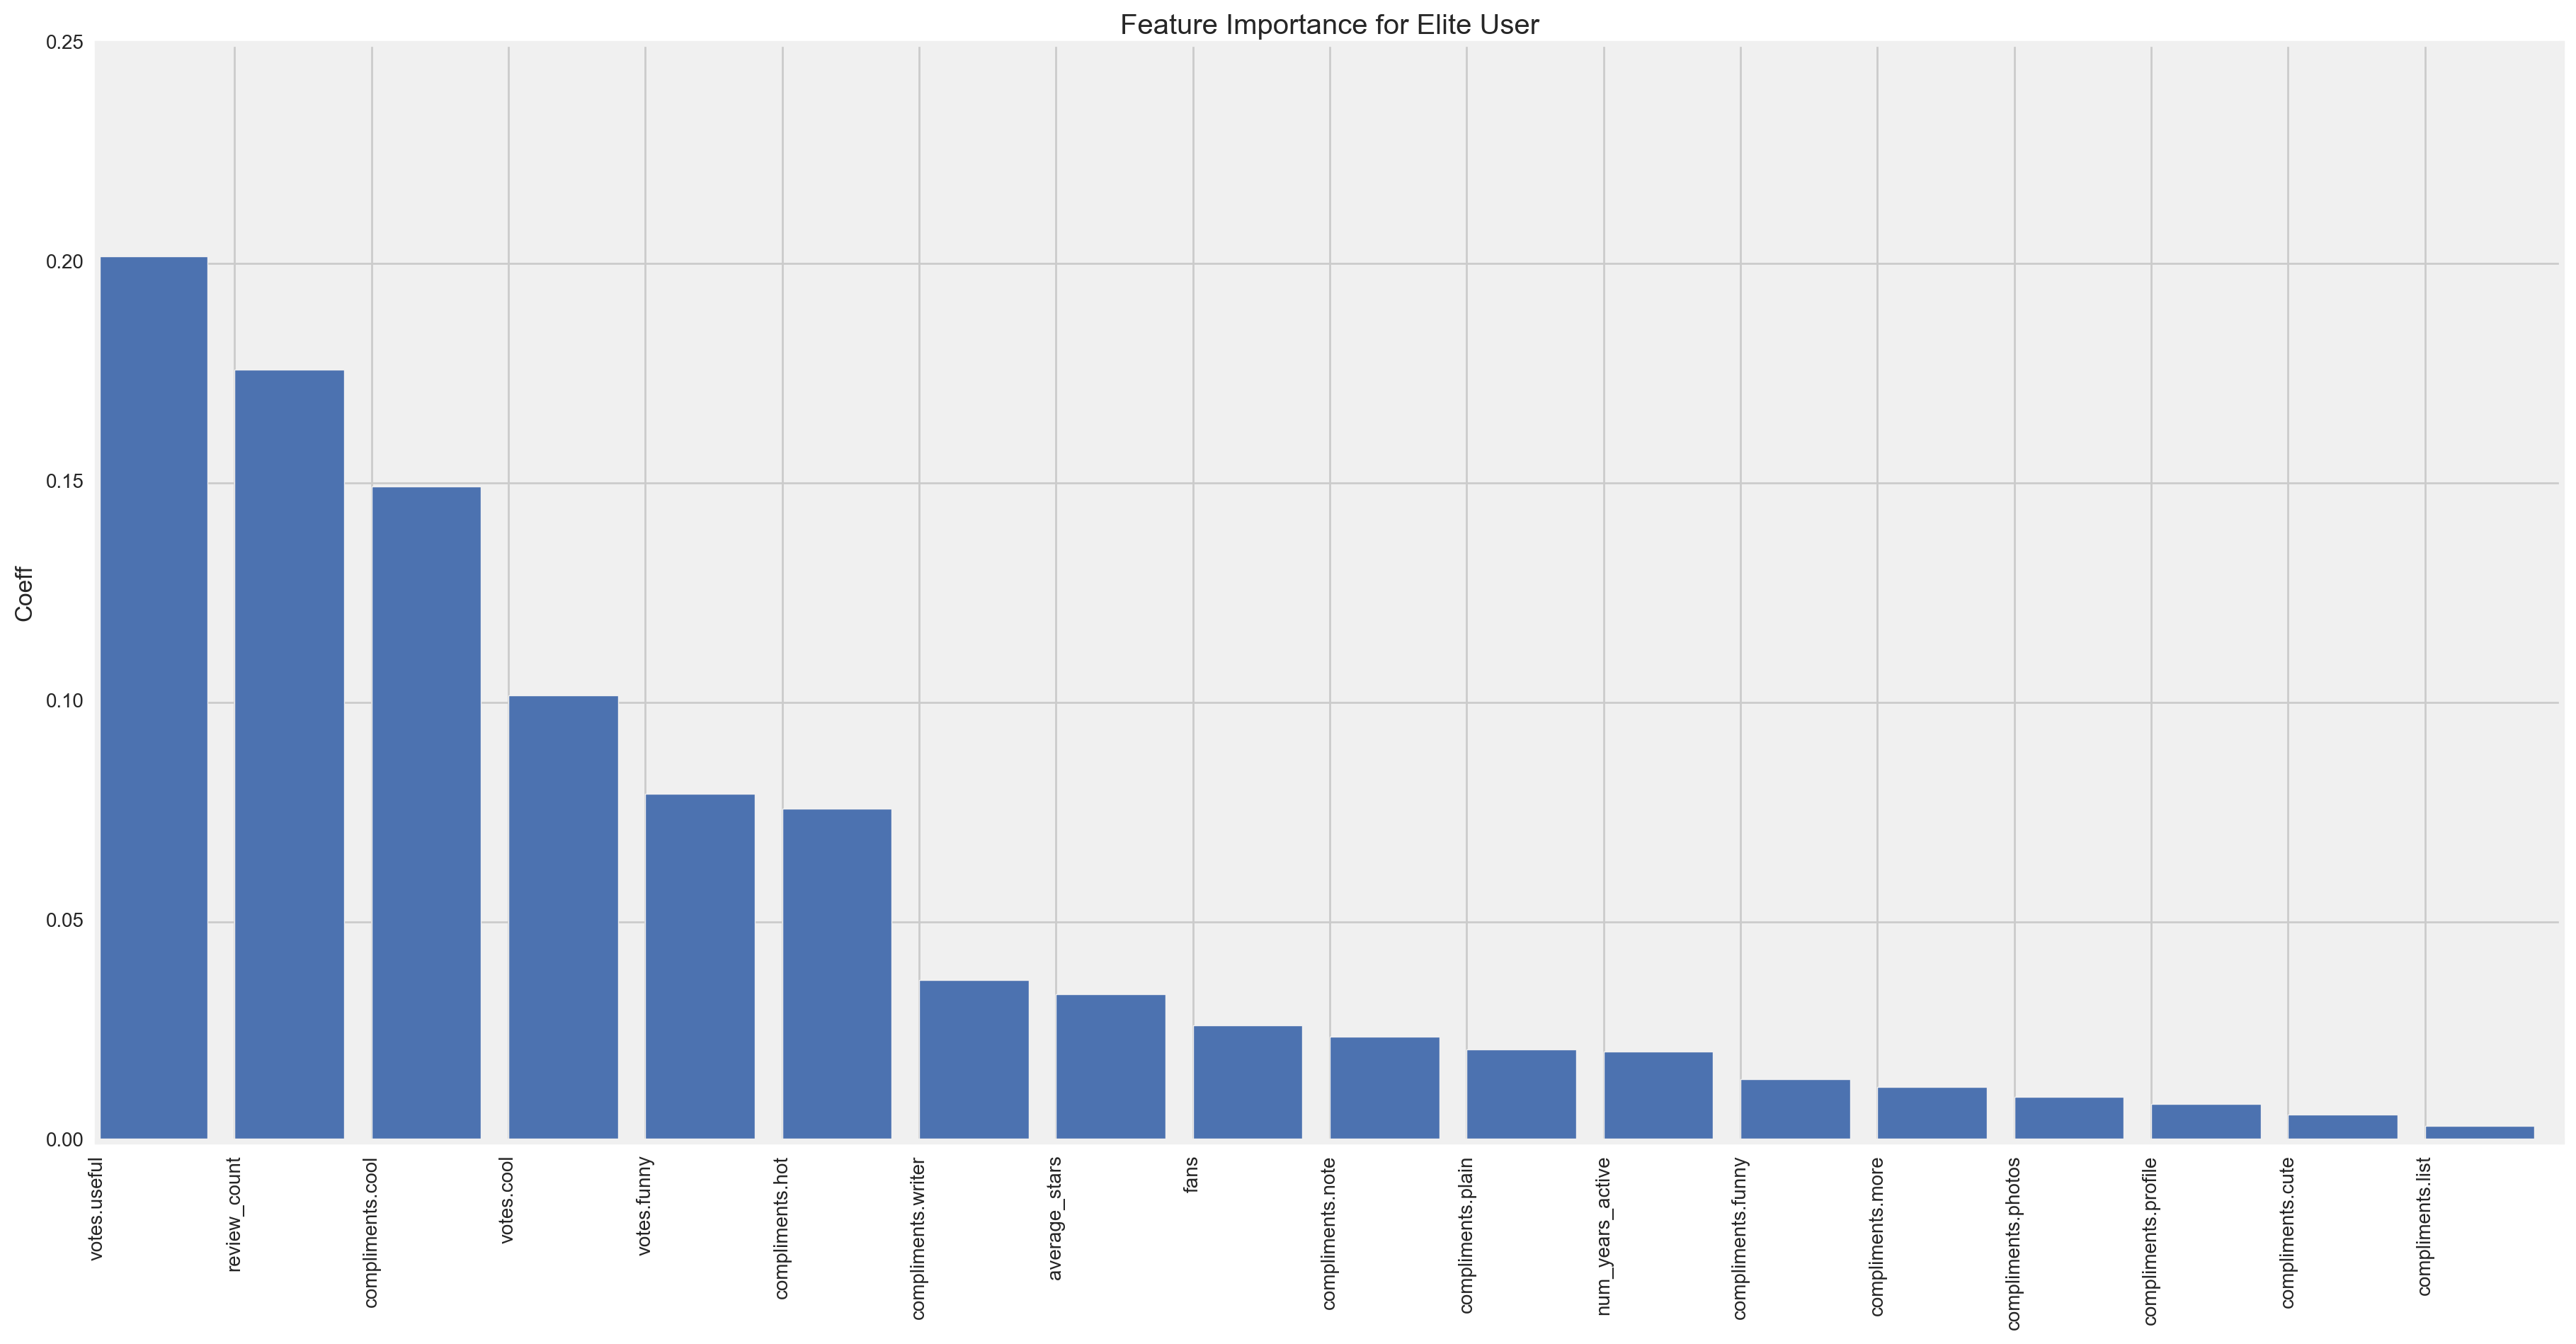

In [430]:
category = []
importance = []

for feature in feat_imp:
    category.append(feature[1])
    importance.append(feature[0])

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(category)), importance)
plt.xticks(np.arange(len(category)), category, rotation='vertical')
plt.ylabel('Coeff')
plt.title('Feature Importance for Elite User')

In [432]:
rf = RandomForestClassifier()

scores_rf = cross_val_score(rf, X_unc, y_u, cv=10, n_jobs=-1)
print scores_rf

print np.mean(scores_rf) 

Xun_train, Xun_test, yun_train, yun_test = train_test_split(X_unc, y_u, train_size=.8)
rf.fit(Xun_train, yun_train)

yun_pred = rf.predict(Xun_test)

print accuracy_score(yun_test, yun_pred)
print precision_score(yun_test, yun_pred)
print recall_score(yun_test, yun_pred)
print f1_score(yun_test, yun_pred)

x_cols = X_unc.columns
feat_imp = sorted(zip(rf.feature_importances_, x_cols), reverse=True)
feat_imp

[ 0.93142421  0.93336569  0.93343503  0.92926491  0.93398058  0.93252427
  0.93377254  0.93190014  0.93287101  0.93162275]
0.932416113385
0.931454129395
0.730808597748
0.643243243243
0.684235745089


[(0.68054511159338849, 'fans'),
 (0.25686831253392606, 'average_stars'),
 (0.062586575872685388, 'num_years_active')]

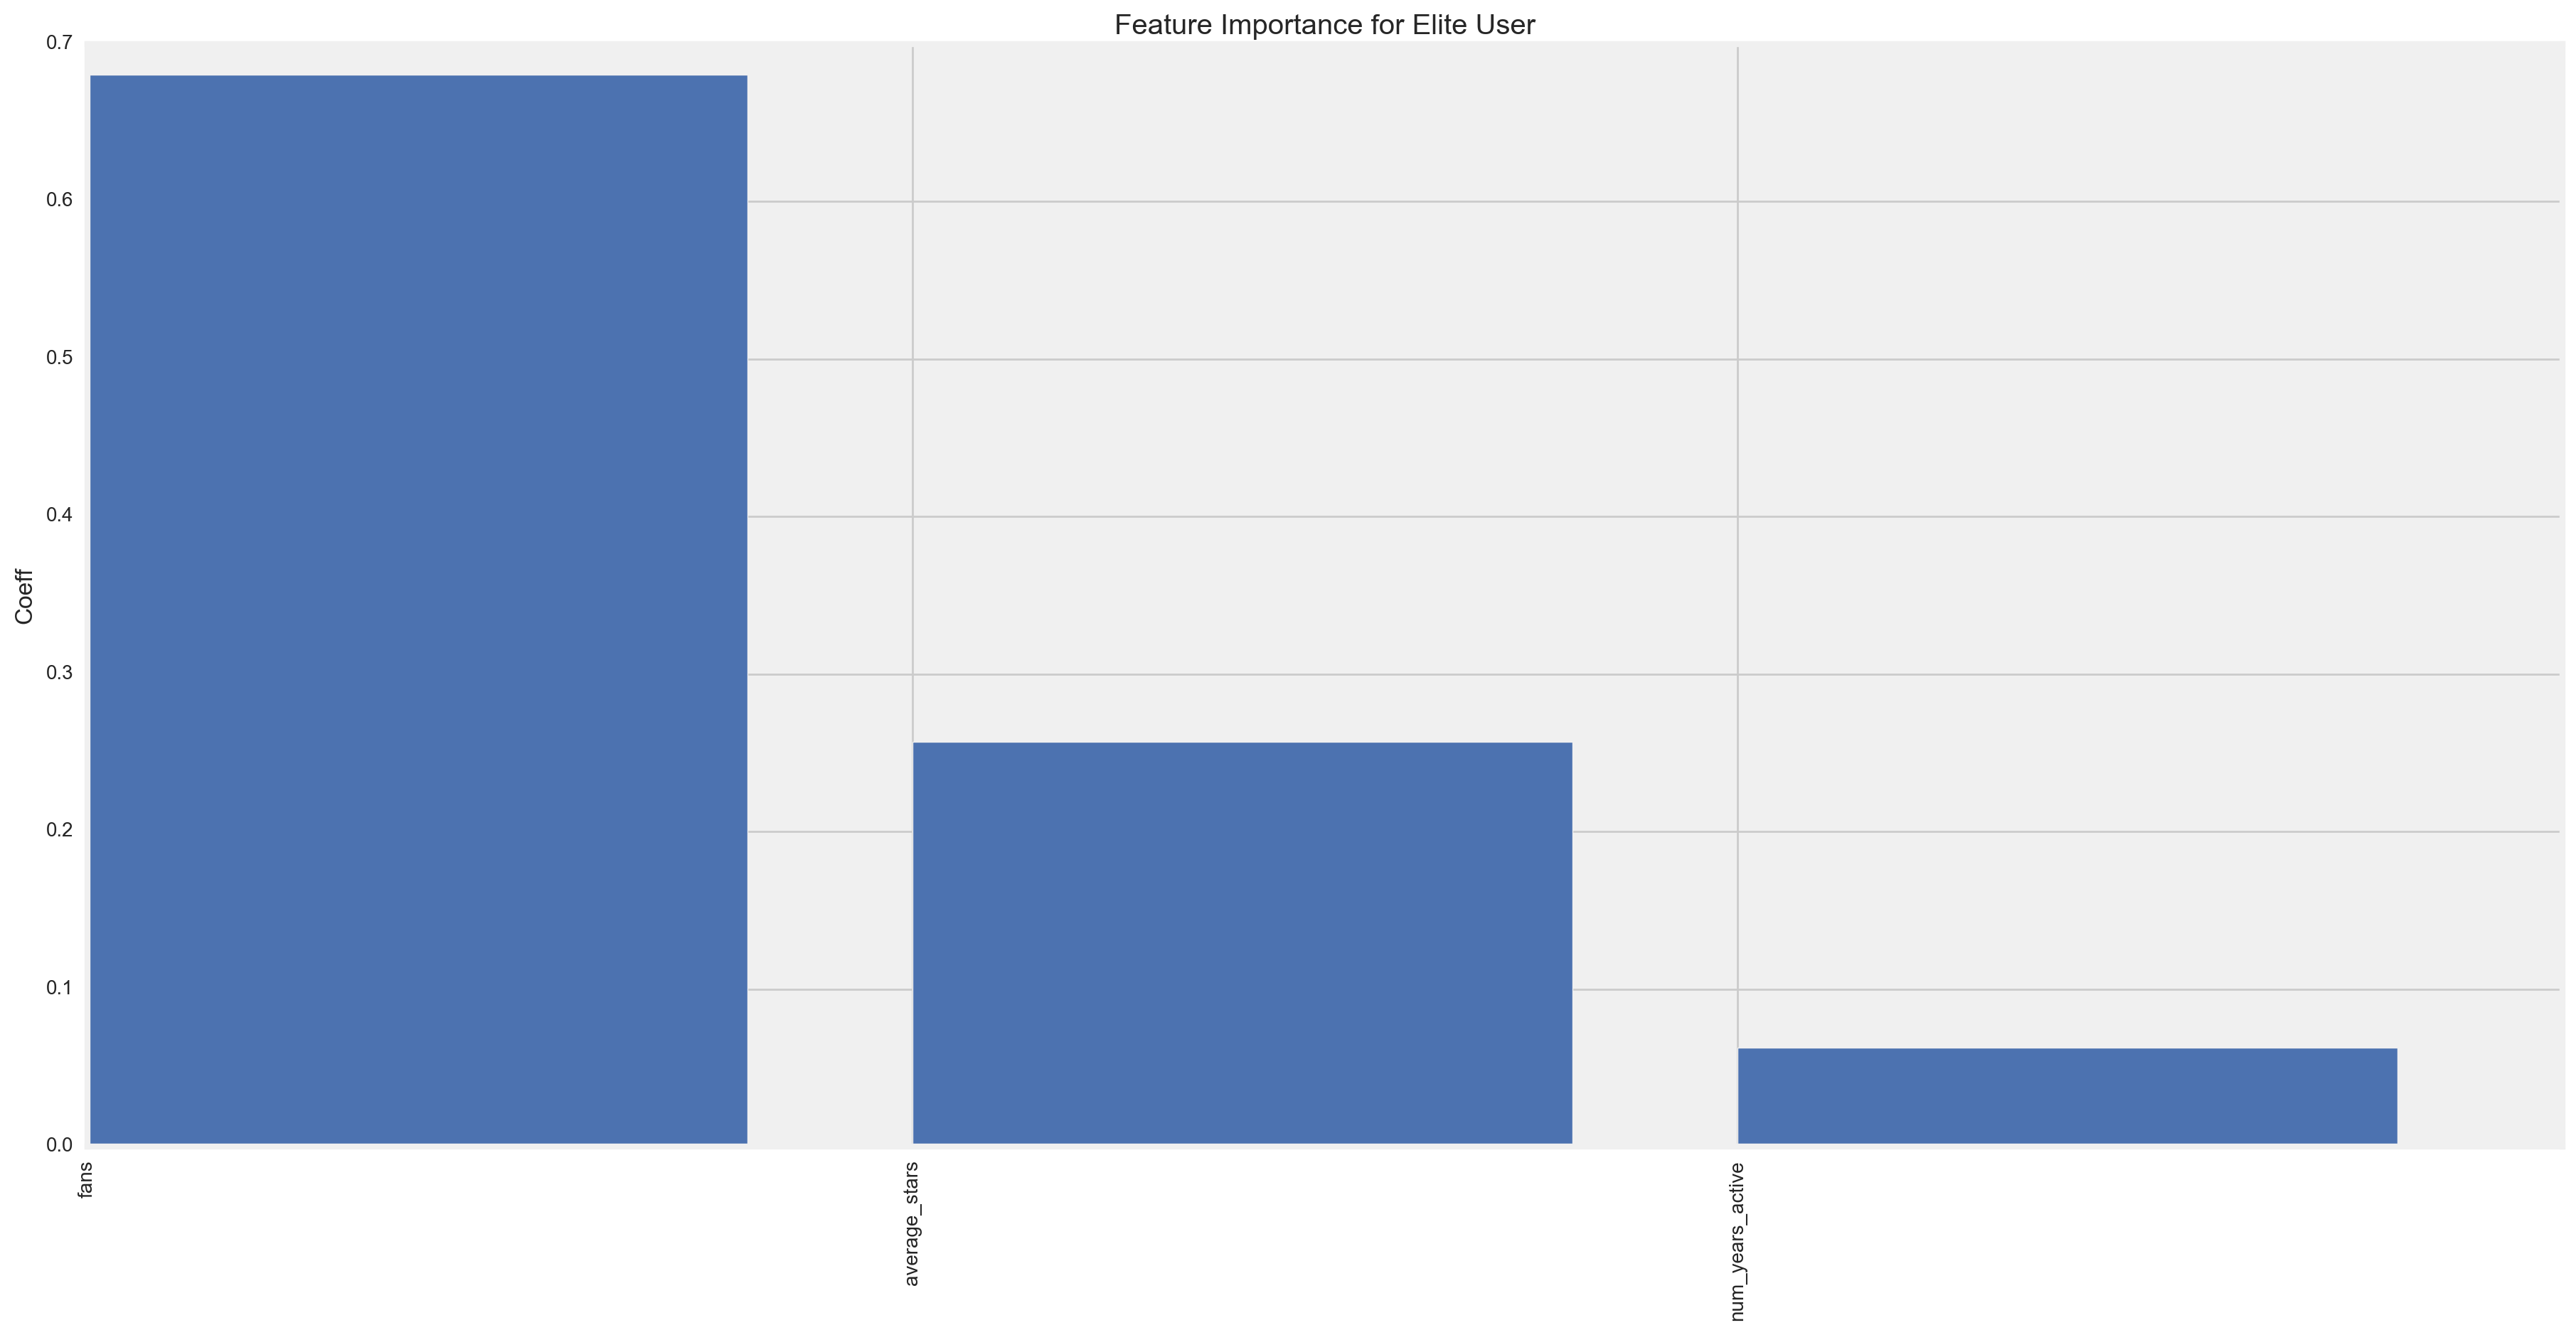

In [433]:
category = []
importance = []

for feature in feat_imp:
    category.append(feature[1])
    importance.append(feature[0])

plt.figure(figsize=(20,10))
plt.bar(np.arange(len(category)), importance)
plt.xticks(np.arange(len(category)), category, rotation='vertical')
plt.ylabel('Coeff')
plt.title('Feature Importance for Elite User')

Clearly the scores are better for the full data set bus as I mentioned above, Fans seems to be a good enough indicator for the accuracy in this random forest classifier. We do see dignificant hits to both precision and recall as I am guessing that the number of true positive is much smaller than the number of negatives. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?

## OOP, Stochastic Gradient Descent, and Linear Algebra

---

In this part of the project, you will implement machine learning algorithms we have covered in class from scratch. 

--- 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6. Implement the `LinearRegrssion` class using Stochastic Gradient Descent to include the following: 

- An option to regularize the model with Ridge Regression. The method should automatically calculate the best `alpha` for the user. The closed form solution for Ridge Regression may be helpful [Hint: Think of the `n_alphas` parameter in sklearn]


Protip: Compare if your implemenation works by applying it on the Diabetes Dataset and seeing it how it compares to opensource implemenations in `sklearn` and `statsmodels`. 

http://statsmodels.sourceforge.net/devel/examples/#regression

http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 7. Extend the Binary `LogisticRegression` model to implement Multi-class classification that fits the model using Stochastic Gradient Descent. Include the following : 

- Use the program we coded in class that implemented Logistic regression for Binary classification and extend it to implement Multi-class classification 
  - [Binary Logistic regression program](https://github.com/ga-students/DSI-SF-5/blob/master/curriculum/week-04/logistic_regression/Logistic_regression.py)

- An option to regularize the model with Ridge Regression. The method should automatically calculate the best `alpha` for the user. The closed form solution for Ridge Regression may be helpful [Hint: Think of the `n_alphas` parameter in sklear

Check if the results of your `LogisticRegression` implementation matches with the Sklearn implementation: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">
### 8. Singular Value Decomposition 

- Read articles on image compression with SVD and use `numpy` apply it to images from the MNIST Datasets. To get the MNIST Datset, use the following comands. Note that the `mnist` data has shape `(70000, 784)`. You will need to convert it to 28x28 images [Hint: `np.reshape`]. 
       
       from sklearn.datasets import fetch_mldata
       mnist = fetch_mldata('MNIST original', data_home=custom_data_home)

    https://inst.eecs.berkeley.edu/~ee127a/book/login/l_svd_apps_image.html

    http://www.frankcleary.com/svdimage/
    
    
- Apply Logistic Regression to classify MNIST Images. This may require having the images be `784` dimensions rather than `28x28`. Compare results of the classifier on a test set when you apply it on the raw dataset vs. the compressed version of dataset from SVD. 

## Optional: Interview Practice

## Coding Questions 
- Implement Binary Search in Python and write down the algorithmic complexity of the Binary Search Algorithm.


- Implement Merge Sort in Python [Hint: First implement the `merge` function that combines two sorted arrays into one sorted array linear time]. What is the time complexity of `mergesort` ?


- Find the closest pair from two sorted arrays. Given two sorted arrays and a number x, find the pair whose sum is closest to x and the pair has an element from each array. We are given two arrays ar1[0…m-1] and ar2[0..n-1] and a number x, we need to find the pair ar1[i] + ar2[j] such that absolute value of (ar1[i] + ar2[j] – x) is minimum. What is the time complexity of this algorithm?

## Probability  and Statistics Questions 

- In any 15-minute interval, there is a 20% probability that you will see at least one shooting star. What is the probability that you see at least one shooting star in the period of an hour?


- A certain couple tells you that they have two children, at least one of which is a girl. What is the probability that they have two girls?


## Interview Questions Related to Material

- Explain what is bias-variance tradeoff to a non-technical person. Why is it a useful framework? How do you detect bias in your models? How about you variance? 


- Explain why cross-validation is important. 


- What is regularization? What are the advantages/disadvantages of different types of regularization schemes? 


- What are the loss functions associated with linear regression, logistic regression, and KNN? 


- Can you give examples of feature engineering on datasets you have worked with? 